### Get data from Steam Community Market API and save to csv

In [8]:
import re
import requests
import pandas as pd

dailyCookie = "76561199704981720%7C%7CeyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MTcwQl8yNDkzRTBDMF80QkU4NSIsICJzdWIiOiAiNzY1NjExOTk3MDQ5ODE3MjAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3MTg2NTU3NjcsICJuYmYiOiAxNzA5OTI4NjU5LCAiaWF0IjogMTcxODU2ODY1OSwgImp0aSI6ICIxNEY5XzI0OTNFMEQxX0VEMDlGIiwgIm9hdCI6IDE3MTgzNjI3ODYsICJydF9leHAiOiAxNzM2NjE4ODA2LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiODEuMTA1LjIwMS41NyIsICJpcF9jb25maXJtZXIiOiAiOTAuMTk3Ljc5LjEzMyIgfQ.g6lI2sJQecwdJpnm9I0Ssp-3VrAyH1VhTaEfzMCuHs3hXptMJhyIbwxU7UR95VrUzWaS5qOpfDiCiRMKOdhpAw"
items = ["Glove Case Key", "Officer Jacques Beltram | Gendarmerie Nationale", "Kilowatt Case"]

def fetch_item_to_df(item):
    # get historical price data of item from API
    url = "https://steamcommunity.com/market/pricehistory/"
    params = {
        'country': 'US',
        'currency': '1',
        'appid': '730',
        'market_hash_name': item
    }
    cookies = {'steamLoginSecure': dailyCookie}
    
    response = requests.get(url, params=params, cookies=cookies)
    jsonData = response.json()

    # print error message if request failed
    if response.status_code != 200:
        print(f"Failed to fetch data for {item}. Status code: {response.status_code}")
        return None

    # convert and clean data to dataframe object
    price_history = jsonData['prices']
    price_history_df = pd.DataFrame(price_history, columns=['date', 'price_usd', 'volume'])
    price_history_df['date'] = pd.to_datetime(price_history_df['date'].str[:-7], format='%b %d %Y')
    return price_history_df

def sanitize_filename(filename):
    """Sanitizes the filename to ensure it is valid for most operating systems."""
    filename = re.sub(r'[\\/*?:"<>|]', '_', filename)  # Replace disallowed characters with underscore
    filename = re.sub(r'\s+', '_', filename)  # Replace spaces with underscores
    return filename

def save_item_to_csv(item):
    csvData = './data/'+ sanitize_filename(item) +'.csv'
    fetch_item_to_df(item).to_csv(csvData, index=False)

# # fetch and save data in items to csv
# for index, item in enumerate(items):
#     save_item_to_csv(item)



### Generate graphs for items

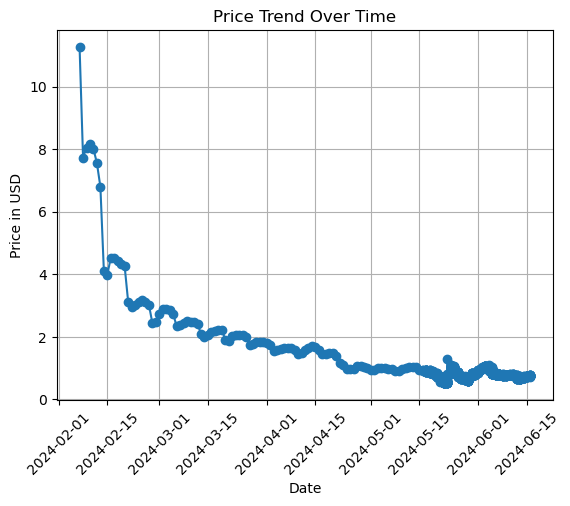

In [9]:
# Mann Co. Supply Crate Key
from matplotlib import pyplot as plt

items = ["Glove Case Key", "Officer Jacques Beltram | Gendarmerie Nationale", "Kilowatt Case"]

current_item = fetch_item_to_df(items[2])

# print(current_item.head())

plt.plot(current_item.date, current_item.price_usd, marker='o')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Price Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()